In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [176]:
df = pd.read_csv('/content/drive/MyDrive/test_notebook/datasets/Daily Household Transactions.csv')

In [177]:
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


# 1. Data Cleaning

In [179]:
df = df.iloc[:, [4, 5, 6, 2]]

In [180]:
df.rename(columns={'Income/Expense': 'Cash Flow'}, inplace=True)

<Axes: >

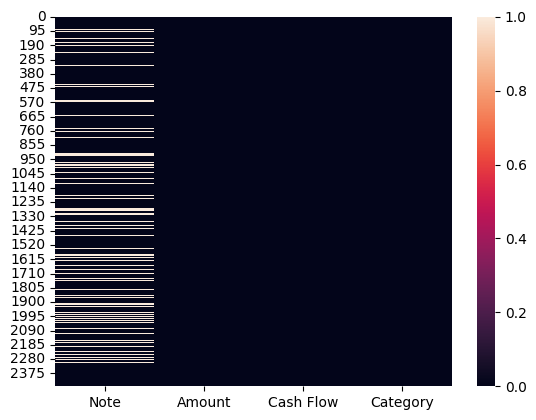

In [181]:
sns.heatmap(df.isna())

In [182]:
df.isna().sum()

,0
Note,521
Amount,0
Cash Flow,0
Category,0


In [183]:
df.dropna(inplace=True)

In [184]:
df.shape

(1940, 4)

In [185]:
df = df[~df.duplicated()]

In [186]:
df.Category.value_counts()


,count
Category,
Food,575
Transportation,219
Household,155
Other,112
Health,83
subscription,47
Apparel,44
Gift,30
Salary,26


In [187]:

df.groupby('Category')[['Amount']].sum()

,Amount
Category,
Apparel,25086.82
Beauty,3599.00
Bonus,1516.00
Culture,4304.36
Dividend earned on Shares,876.75
Documents,100.00
Education,537.00
Equity Mutual Fund A,50000.00
Equity Mutual Fund D,10000.00


In [188]:
category_map = {
    'Food': 'Food & Beverage',

    'Transportation': 'Transport',
    'Tourism': 'Transport',

    'Household': 'Household',
    'maid': 'Household',
    'water (jar /tanker)': 'Household',

    'subscription': 'Subscriptions & Utilities',
    'Saving Bank account 1': 'Subscriptions & Utilities',
    'Documents': 'Subscriptions & Utilities',

    'Health': 'Health & Grooming',
    'Beauty': 'Health & Grooming',
    'Grooming': 'Health & Grooming',

    'Apparel': 'Shopping & Lifestyle',
    'Culture': 'Shopping & Lifestyle',
    'Social Life': 'Shopping & Lifestyle',
    'Self-development': 'Shopping & Lifestyle',

    'Gift': 'Family & Gifts',
    'Family': 'Family & Gifts',
    'Festivals': 'Family & Gifts',

    'Education': 'Education',

    'Salary': 'Income',
    'Bonus': 'Income',
    'Maturity amount': 'Income',
    'Interest': 'Income',
    'Dividend earned on Shares': 'Income',

    'Investment': 'Investments',
    'Equity Mutual Fund A': 'Investments',
    'Equity Mutual Fund D': 'Investments',
    'Equity Mutual Fund E': 'Investments',
    'Equity Mutual Fund F': 'Investments',
    'Share Market': 'Investments',
    'Fixed Deposit': 'Investments',
    'Recurring Deposit': 'Investments',
    'Public Provident Fund': 'Investments',

    'Money transfer': 'Other',
    'Petty cash': 'Other',

    'Gpay Reward': 'Other',
    'Other': 'Other'
}

In [189]:
df['Category'] = df['Category'].map(category_map)

In [190]:
df.Category.value_counts()

,count
Category,
Food & Beverage,575
Transport,224
Household,159
Other,118
Health & Grooming,100
Family & Gifts,67
Income,59
Shopping & Lifestyle,58
Subscriptions & Utilities,53


<Axes: xlabel='Amount', ylabel='Density'>

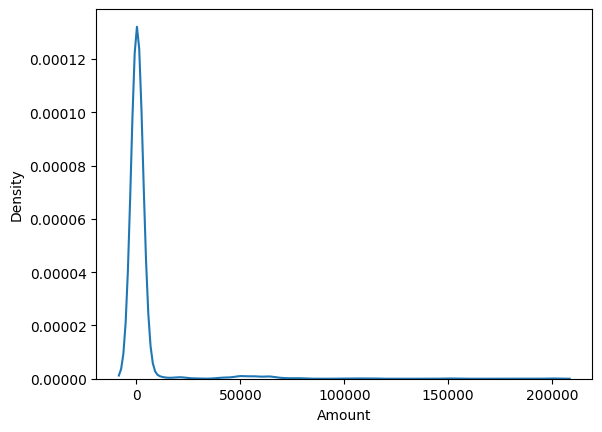

In [191]:
sns.kdeplot(df['Amount'])

In [192]:
df['Category'] = df['Category'].astype('category')

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1447 entries, 0 to 2460
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Note       1447 non-null   object  
 1   Amount     1447 non-null   float64 
 2   Cash Flow  1447 non-null   object  
 3   Category   1447 non-null   category
dtypes: category(1), float64(1), object(2)
memory usage: 47.0+ KB


In [194]:
df['Cash Flow'] = df['Cash Flow'].map({'Transfer-Out': 'Income'}).fillna(df['Cash Flow'])

In [195]:
df['Cash Flow'] = df['Cash Flow'].map({"Income": 0, 'Expense': 1})

# 2. Feature Engineering

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Use TF-IDF on Note
vectorizer = TfidfVectorizer(max_features=300)
X_text = vectorizer.fit_transform(df['Note'])


In [138]:
pd.DataFrame(vectorizer.fit_transform(df['Note']).toarray())

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [219]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TF-IDF on Note
vectorizer = TfidfVectorizer(max_features=300)
X_text = vectorizer.fit_transform(df['Note'])
columns1= pd.DataFrame(X_text.toarray()).columns.to_list()
columns2 = ['Amount', 'Cash Flow']

X = np.concatenate((pd.DataFrame(X_text.toarray()), df[['Amount', 'Cash Flow']]), axis=1)
X = pd.DataFrame(X)
X.columns = columns1+columns2
y = df['Category']

X.columns = X.columns.astype(str)


In [220]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [221]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

X_test['Amount'] = scaler.transform(X_test[['Amount']])

In [222]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [223]:
y_pred = model.predict(X_test)

In [224]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

                           precision    recall  f1-score   support

                Education       1.00      0.80      0.89        15
           Family & Gifts       0.86      0.94      0.90        54
          Food & Beverage       0.96      0.99      0.97       460
        Health & Grooming       1.00      0.91      0.95        80
                Household       0.87      0.97      0.91       127
                   Income       1.00      1.00      1.00        47
              Investments       1.00      1.00      1.00        13
                    Other       0.95      0.85      0.90        94
     Shopping & Lifestyle       1.00      0.89      0.94        46
Subscriptions & Utilities       1.00      0.88      0.94        42
                Transport       1.00      0.98      0.99       179

                 accuracy                           0.96      1157
                macro avg       0.97      0.93      0.95      1157
             weighted avg       0.96      0.96      0.96    

In [225]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                Education       0.40      0.67      0.50         3
           Family & Gifts       0.24      0.54      0.33        13
          Food & Beverage       0.78      0.64      0.70       115
        Health & Grooming       0.47      0.40      0.43        20
                Household       0.31      0.50      0.39        32
                   Income       0.79      0.92      0.85        12
              Investments       1.00      0.67      0.80         3
                    Other       0.40      0.25      0.31        24
     Shopping & Lifestyle       0.57      0.33      0.42        12
Subscriptions & Utilities       0.67      0.55      0.60        11
                Transport       0.93      0.96      0.95        45

                 accuracy                           0.62       290
                macro avg       0.60      0.58      0.57       290
             weighted avg       0.66      0.62      0.63    

## 2.2 Cost Complexity Pruning

In [226]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

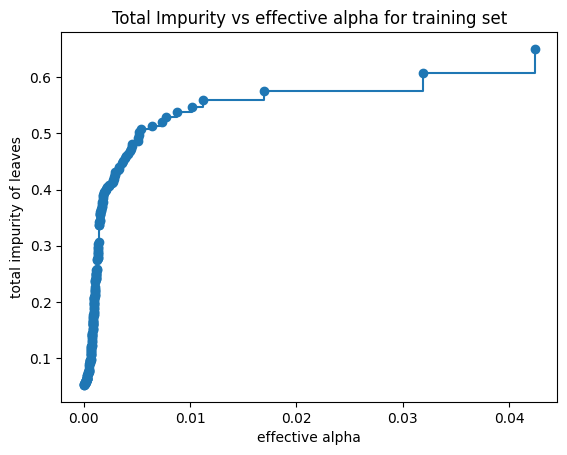

In [227]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

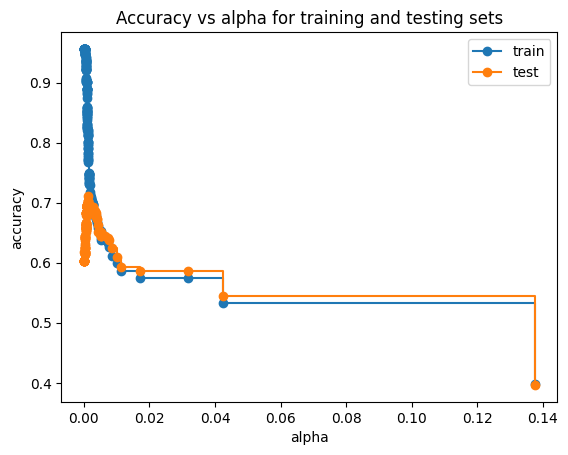

In [228]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [229]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,Amount,Cash Flow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,199.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251.0,1.0


In [230]:
cv_scores = [np.mean(cross_val_score(clf, X, y, cv=5)) for clf in clfs]

In [231]:
best_index = np.argmax(test_scores)
best_alpha = ccp_alphas[best_index]
best_model = clfs[best_index]

In [232]:
final_model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
final_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0014093735188334677),
                       random_state=42)

In [235]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

                           precision    recall  f1-score   support

                Education       1.00      0.80      0.89        15
           Family & Gifts       0.86      0.94      0.90        54
          Food & Beverage       0.96      0.99      0.97       460
        Health & Grooming       1.00      0.91      0.95        80
                Household       0.87      0.97      0.91       127
                   Income       1.00      1.00      1.00        47
              Investments       1.00      1.00      1.00        13
                    Other       0.95      0.85      0.90        94
     Shopping & Lifestyle       1.00      0.89      0.94        46
Subscriptions & Utilities       1.00      0.88      0.94        42
                Transport       1.00      0.98      0.99       179

                 accuracy                           0.96      1157
                macro avg       0.97      0.93      0.95      1157
             weighted avg       0.96      0.96      0.96    

In [236]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                Education       0.40      0.67      0.50         3
           Family & Gifts       0.24      0.54      0.33        13
          Food & Beverage       0.78      0.64      0.70       115
        Health & Grooming       0.47      0.40      0.43        20
                Household       0.31      0.50      0.39        32
                   Income       0.79      0.92      0.85        12
              Investments       1.00      0.67      0.80         3
                    Other       0.40      0.25      0.31        24
     Shopping & Lifestyle       0.57      0.33      0.42        12
Subscriptions & Utilities       0.67      0.55      0.60        11
                Transport       0.93      0.96      0.95        45

                 accuracy                           0.62       290
                macro avg       0.60      0.58      0.57       290
             weighted avg       0.66      0.62      0.63    

# 3. Making pipeline

In [237]:
df = pd.read_csv('/content/drive/MyDrive/test_notebook/datasets/Daily Household Transactions.csv')

In [238]:
df = df.iloc[:, [4, 5, 6, 2]]

<Axes: >

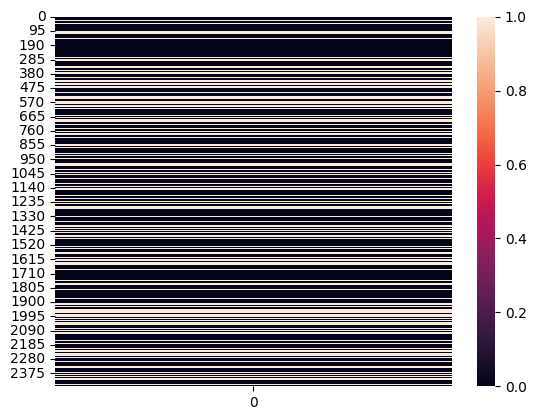

In [239]:
sns.heatmap(np.expand_dims(df.duplicated(), axis=1))

In [240]:
df = df[~df.duplicated()]

In [241]:
df.shape

(1624, 4)

In [242]:
df.rename(columns={'Income/Expense': 'Cash Flow'}, inplace=True)

In [243]:
df['Category'] = df['Category'].map(category_map)

In [244]:
df['Category'] = df['Category'].astype('category')

In [245]:
df['Cash Flow'] = df['Cash Flow'].map({'Transfer-Out': 'Income'}).fillna(df['Cash Flow'])

In [246]:
df['Cash Flow'] = df['Cash Flow'].map({"Income": 0, 'Expense': 1})

In [247]:
df.dropna(inplace=True)

In [248]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline

def encode_cashflow_column(X):
    return X.replace({'Out': 0, 'In': 1})[['Cash Flow']].values  # ensure 2D array

preprocessor = ColumnTransformer([
    ('tfidf', TfidfVectorizer(max_features=300), 'Note'),
    ('scaler', StandardScaler(), ['Amount']),
    ('cashflow_encoder', FunctionTransformer(encode_cashflow_column), ['Cash Flow'])
])
model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)
])

In [249]:
X =  df.iloc[:, :-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.2, random_state=42, stratify=y
)

In [250]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('tfidf',
                                                  TfidfVectorizer(max_features=300),
                                                  'Note'),
                                                 ('scaler', StandardScaler(),
                                                  ['Amount']),
                                                 ('cashflow_encoder',
                                                  FunctionTransformer(func=<function encode_cashflow_column at 0x7c57d623e3e0>),
                                                  ['Cash Flow'])])),
                ('classifier',
                 DecisionTreeClassifier(ccp_alpha=np.float64(0.0014093735188334677),
                                        random_state=42))])

In [251]:
y_pred = pipeline.predict(X_test)

In [252]:
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                Education       0.67      0.67      0.67         3
           Family & Gifts       0.35      0.46      0.40        13
          Food & Beverage       0.70      0.93      0.80       115
        Health & Grooming       1.00      0.25      0.40        20
                Household       0.44      0.44      0.44        32
                   Income       0.80      1.00      0.89        12
              Investments       1.00      0.67      0.80         3
                    Other       0.88      0.29      0.44        24
     Shopping & Lifestyle       0.67      0.17      0.27        12
Subscriptions & Utilities       0.75      0.55      0.63        11
                Transport       0.98      0.96      0.97        45

                 accuracy                           0.71       290
                macro avg       0.75      0.58      0.61       290
             weighted avg       0.74      0.71      0.68    

In [253]:
print(classification_report(y_train, pipeline.predict(X_train)))

                           precision    recall  f1-score   support

                Education       0.71      0.67      0.69        15
           Family & Gifts       0.58      0.56      0.57        54
          Food & Beverage       0.73      0.99      0.84       460
        Health & Grooming       0.95      0.49      0.64        80
                Household       0.54      0.48      0.51       127
                   Income       0.87      1.00      0.93        47
              Investments       1.00      0.69      0.82        13
                    Other       0.86      0.19      0.31        94
     Shopping & Lifestyle       0.91      0.46      0.61        46
Subscriptions & Utilities       0.85      0.69      0.76        42
                Transport       1.00      0.95      0.97       179

                 accuracy                           0.77      1157
                macro avg       0.82      0.65      0.70      1157
             weighted avg       0.79      0.77      0.74    

In [254]:
cv_scores = cross_val_score(pipeline, X, y, cv=5)

In [255]:
cv_scores

array([0.67586207, 0.68965517, 0.65743945, 0.65397924, 0.58477509])

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1447 entries, 0 to 2460
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Note       1447 non-null   object  
 1   Amount     1447 non-null   float64 
 2   Cash Flow  1447 non-null   int64   
 3   Category   1447 non-null   category
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 47.0+ KB


In [286]:
new_data = pd.DataFrame([{
    'Note': 'starbucks food and coffee',
    'Amount': 100.0,
    'Cash Flow': 1
}])

# 🔮 Predict using the trained pipeline
pred_label = pipeline.predict(new_data)[0]

In [287]:
pred_label

'Food & Beverage'